# MA4M4 Coding Examples Part1 

The below are just examples of useful Python packages for analysing networks. Before going through it, important notes are: 
1. you don't need to use Python, you can use the language of your choice
2. the purpose of this initial notebook is to give you simple examples of the types of packages you can use to represent networks and compute basic properties. You are encouraged to try different parts of the code on an empirical network of your choice. Note and discuss questions, if any, on Teams.
3. you are encouraged to experiment with different packages, and at minimum, you should be able to: 
     - import an empirical network from a website (eg Konect) into Python (or Matlab, or R, etc).
     Note: the network data is included in the file for ease, but you should practise importing a different
     empirical network yourselves.
     - compute some key network properites (eg degrees, centrality, average distance) 
     - visualise the network and its corresponding adjacency matrix

In these Jupyter notebooks, we mainly give examples using [Networkx](https://networkx.org/>) alongside [Numpy](https://numpy.org/doc/stable/) for matrix and array operations; and [Pandas](https://pandas.pydata.org/) for processing Dataframes.

In [1]:
# If packages are not available, try running pip install in the command line [conda prompt in Windows system].
# For example, pip install betterspy
# It can sometimes also be useful to check any constraints on Python version compatibility 

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import betterspy # Package to visualize sparse matrix

## 1. Process data and build network
Have the download documents ready in the same folder of this jupyter notebook (can have it somewhere else, just pass the path of the files when input the data file)

### A-1. Read file and create network from edgelist
You can find and download the Zachary karate club dataset used [here](http://konect.cc/networks/ucidata-zachary/). 

In [2]:
# Read the file using built in python commmand and build the network directly from edge_list

fh = open("out.ucidata-zachary", "rb")       # 'rb': open the file in binary format for reading
G = nx.read_edgelist(fh, comments='%',create_using=nx.DiGraph())   
    # comments='%': the character used to indicate the start of a comment.
    # create_using=nx.DiGraph(): create a directed graph allowing self loops but not multiple edges.(default=nx.Graph)
fh.close()

In [3]:
G.edges

OutEdgeView([('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('1', '7'), ('1', '8'), ('1', '9'), ('1', '11'), ('1', '12'), ('1', '13'), ('1', '14'), ('1', '18'), ('1', '20'), ('1', '22'), ('1', '32'), ('2', '3'), ('2', '4'), ('2', '8'), ('2', '14'), ('2', '18'), ('2', '20'), ('2', '22'), ('2', '31'), ('3', '4'), ('3', '8'), ('3', '9'), ('3', '10'), ('3', '14'), ('3', '28'), ('3', '29'), ('3', '33'), ('4', '8'), ('4', '13'), ('4', '14'), ('5', '7'), ('5', '11'), ('6', '7'), ('6', '11'), ('6', '17'), ('7', '17'), ('9', '31'), ('9', '33'), ('9', '34'), ('10', '34'), ('14', '34'), ('20', '34'), ('24', '26'), ('24', '28'), ('24', '30'), ('24', '33'), ('24', '34'), ('26', '32'), ('25', '26'), ('25', '28'), ('25', '32'), ('28', '34'), ('29', '32'), ('29', '34'), ('30', '33'), ('30', '34'), ('27', '30'), ('27', '34'), ('31', '33'), ('31', '34'), ('32', '33'), ('32', '34'), ('33', '34'), ('15', '33'), ('15', '34'), ('16', '33'), ('16', '34'), ('19', '33'), ('19', '34'), ('21', '33')

### A-2. Input Edgelist as a Pandas dataframe
Sometimes we may consider processing the edges before building the network. 
Pandas dataframe can be useful. Pandas is a very useful tool to process tabulet data and widely used in not only network science but also other data scicence related field.

In this example, we look at a small (visualization purpose) directed weighted graph ([kangaroo](http://konect.cc/networks/moreno_kangaroo/)) which is a bit complicated than undirected and unweighted case. Once you know how to build a network of this kind, it will be straightforward to input simple ones.


In [4]:
df = pd.read_csv("out.moreno_kangaroo_kangaroo",sep=' ',skiprows=[0])
    # sep=' ': separator(default type is ',')
    # skiprows=[0]: skip the first line
cols = [0,1,2]
df = df[df.columns[cols]] # return the first three columns
    # df.columns: return index of columns(use name to represent index)
df.columns=['from','to','weight'] # rename columns
df.head() # viewing the first 5 lines

,from,to,weight
0,1,2,21
1,1,3,10
2,1,4,45
3,1,5,54
4,1,6,7


In [5]:
df.describe()

,from,to,weight
count,91.000000,91.000000,91.000000
mean,4.780220,10.373626,6.098901
std,3.168604,3.570398,9.037029
min,1.000000,2.000000,1.000000
25%,2.000000,8.000000,2.000000
50%,4.000000,11.000000,3.000000
75%,6.500000,13.000000,6.500000
max,14.000000,17.000000,54.000000


Then, we import network from pandas directly.

In [6]:
# notice how input values consistent with pandas column names.
G = nx.from_pandas_edgelist(df,source='from',target='to',edge_attr='weight',create_using=nx.DiGraph)
    # edge_attr is where we state the weight information
    # create_using=nx.DiGraph(): create a directed graph allowing self loops but not multiple edges.

### B. Sanity check.
1. Whether the network is directed
2. Whether the network is weighted
3. Check number of links/number of nodes.
4. Think of other things can be checked to ensure the input network make sense

In [7]:
nx.is_directed(G)

True

In [8]:
nx.is_weighted(G)

True

In [9]:
len(G.nodes), len(G.edges)

(17, 91)

Usually, we look at indegree, outdegree and total degree seperately. Try to get these values and plot the histogram of it.

In [10]:
# plot histogram for in degrees
# plot histogram for out degrees
# plot histogram for total degrees

### C. Create graph from adjacency matrix
We can also built the network by input a adjacent matrix.

Firstly, lets compute an adjacency matrix from the edgelist and visualize it.

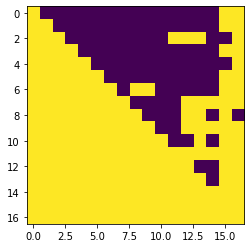

In [11]:
adj0 = nx.adjacency_matrix(G,weight='weight')
betterspy.show(adj0)

Note that adj0 is of sparse matrix type. Some usual numpy operations on dense matrix may not work. For example, if you want to see and read it, you need to turn into a dense type.

In [12]:
adj0 # A sparse matrix is a matrix that is comprised of mostly zero values

<17x17 sparse matrix of type '<class 'numpy.int64'>'
	with 91 stored elements in Compressed Sparse Row format>

In [13]:
# notice adj0 is a sparse matrix to print it need to turn into a dense type
adj0.todense() # returns a matrix

matrix([[ 0, 21, 10, 45, 54,  7, 16,  1,  3,  4,  7,  3,  2,  3,  3,  0,
          0],
        [ 0,  0,  9, 19, 20,  3,  9,  1, 10,  4, 11,  2,  2,  2,  6,  0,
          0],
        [ 0,  0,  0,  8, 10,  3,  5,  1,  9,  4, 10,  0,  0,  0,  3,  2,
          0],
        [ 0,  0,  0,  0, 45,  7, 17,  1,  1,  3,  6,  3,  2,  3,  4,  0,
          0],
        [ 0,  0,  0,  0,  0,  6, 17,  1,  3,  4,  6,  1,  2,  3,  3,  1,
          0],
        [ 0,  0,  0,  0,  0,  0,  4,  1,  2,  2,  3,  3,  3,  1,  4,  0,
          0],
        [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  5,  3,  1,  3,  3,  0,
          0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,
          0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  9,  1,  0,  0,  2,  0,
          1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  1,  0,  0,  0,  0,
          0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  0,  5,  0,
          0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0

 Let's turn this into a unweighted directed matrix. We are going to built network using the new matrix.

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


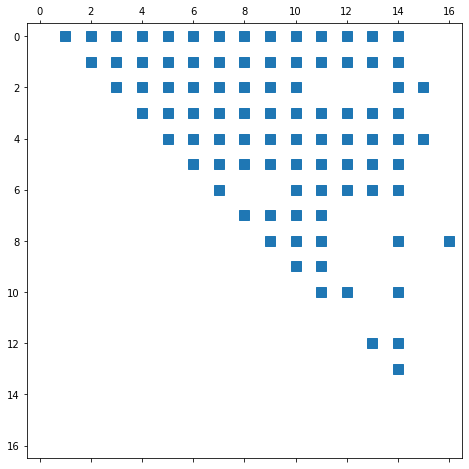

In [14]:
unweighted_adj = adj0.copy() # so that change in unweighted_adj won't affect adj0
unweighted_adj[unweighted_adj>0] = 1

# one way of visualization sparse matrix
print(unweighted_adj.todense())

# another way to visualize sparse matrix
plt.figure(figsize=(8,8))
plt.spy(unweighted_adj)

In [15]:
G_unweighted = nx.DiGraph(unweighted_adj)
G_unweighted.edges.data()

OutEdgeDataView([(0, 1, {'weight': 1}), (0, 2, {'weight': 1}), (0, 3, {'weight': 1}), (0, 4, {'weight': 1}), (0, 5, {'weight': 1}), (0, 6, {'weight': 1}), (0, 7, {'weight': 1}), (0, 8, {'weight': 1}), (0, 9, {'weight': 1}), (0, 10, {'weight': 1}), (0, 11, {'weight': 1}), (0, 12, {'weight': 1}), (0, 13, {'weight': 1}), (0, 14, {'weight': 1}), (1, 2, {'weight': 1}), (1, 3, {'weight': 1}), (1, 4, {'weight': 1}), (1, 5, {'weight': 1}), (1, 6, {'weight': 1}), (1, 7, {'weight': 1}), (1, 8, {'weight': 1}), (1, 9, {'weight': 1}), (1, 10, {'weight': 1}), (1, 11, {'weight': 1}), (1, 12, {'weight': 1}), (1, 13, {'weight': 1}), (1, 14, {'weight': 1}), (2, 3, {'weight': 1}), (2, 4, {'weight': 1}), (2, 5, {'weight': 1}), (2, 6, {'weight': 1}), (2, 7, {'weight': 1}), (2, 8, {'weight': 1}), (2, 9, {'weight': 1}), (2, 10, {'weight': 1}), (2, 14, {'weight': 1}), (2, 15, {'weight': 1}), (3, 4, {'weight': 1}), (3, 5, {'weight': 1}), (3, 6, {'weight': 1}), (3, 7, {'weight': 1}), (3, 8, {'weight': 1}), (3, 

In [16]:
# Notice we still have 'weight' feature although they all have value 1. We can del the feature.
for u,v in G_unweighted.edges:
    # u: starting point of edges
    # v: end point of edges
    del G_unweighted[u][v]['weight']

In [17]:
nx.is_weighted(G_unweighted)

False

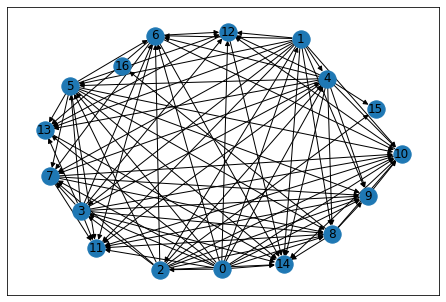

In [18]:
nx.draw(G_unweighted, pos = nx.spring_layout(G_unweighted, k=5), with_labels=True) # Take times for large network
    # k helps determine the distance between nodes
plt.axis("on");

## 2. Network analysis

Now, Let us look at a larger unweighted undirected network - [US power grid](http://konect.cc/networks/opsahl-powergrid/). For undirected network, we can easy use the toolkits in networkx. Note that, there are other weighted versions of some concepts, e.g, weighted clustering coef/ weighted PageRank. 

In [19]:
# Read the file using bulit in python commmand and built directly from edge_list
fh = open("out.opsahl-powergrid", "rb")
# fh = open("out.opsahl-openflights", "rb")
G_powergrid = nx.read_edgelist(fh, comments='%',create_using=nx.Graph())
# nx.Graph(): Graphs hold undirected edges. Self loops are allowed but multiple (parallel) edges are not.
fh.close()

In [20]:
nx.is_directed(G_powergrid)

False

In [21]:
print(nx.is_weighted(G)) # But weight column contains empty lists

True


***1. Get the degree sequence of all nodes and plot the histogram for the degree.***

In [22]:
degree= np.array([b for x,b in nx.degree(G_powergrid)])
    # nx.degree(G_powergrid): return a list of (node, degree) pairs
print(len(degree))

4941


In [23]:
pk = degree/np.sum(degree)

(array([3.24045965e-01, 1.64271740e-01, 4.37383346e-02, 1.46169241e-02,
        3.03582271e-03, 4.16020149e-03, 1.12437878e-03, 3.37313634e-04,
        0.00000000e+00, 2.24875756e-04]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <BarContainer object of 10 artists>)

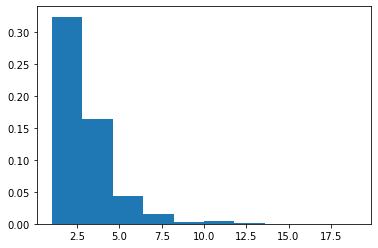

In [24]:
plt.hist(degree,density=True)

***2. Plot the degree distribution in loglog scale. Can you observe power law in the plot. Think about how you can approximate the $\alpha$.***
1. Start by finding P(x=k) from degree sequence
2. Plot P(x=k)

In [25]:
degree_freq = np.bincount(degree)
degrees = range(len(degree_freq))

Text(0, 0.5, 'Frequency')

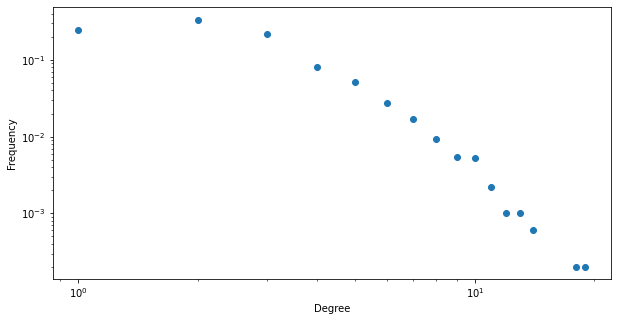

In [26]:
plt.figure(figsize=(10, 5)) 
plt.scatter(degrees, degree_freq/np.sum(degree_freq)) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')

***3. Using the P(x=k) you find above, try to plot the cdf i,e P(x>=k), also in log log scale***

You might want to use plt.step

Text(0.5, 0, 'k')

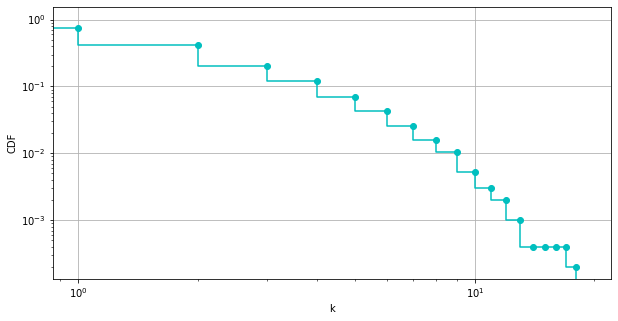

In [27]:
plt.figure(figsize=(10,5))
plt.step(degrees,1-np.cumsum(degree_freq/np.sum(degree_freq)),'co-') # or simply plt.loglog. Try it out.
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylabel("CDF")
plt.xlabel("k")

## L3 & L4 Structure of networks

Let's use apply some concepts and measures we learnt in W2.

### Task :
Get a small undirected network you like. Get the stats and measure we learn in L3-L4 and try to visulize it on graph.


In [28]:
fh = open("out.ucidata-zachary", "rb")
G = nx.read_edgelist(fh, comments='%')
fh.close()

1. Find out number of nodes and links

In [29]:
len(G.nodes), len(G.edges)

(34, 78)

2. Compute the diameter of the network.

In [30]:
nx.diameter(G)

5

3. Check the all possible shortest path

In [31]:
nx.shortest_path(G)

{'1': {'1': ['1'],
  '2': ['1', '2'],
  '3': ['1', '3'],
  '4': ['1', '4'],
  '5': ['1', '5'],
  '6': ['1', '6'],
  '7': ['1', '7'],
  '8': ['1', '8'],
  '9': ['1', '9'],
  '11': ['1', '11'],
  '12': ['1', '12'],
  '13': ['1', '13'],
  '14': ['1', '14'],
  '18': ['1', '18'],
  '20': ['1', '20'],
  '22': ['1', '22'],
  '32': ['1', '32'],
  '31': ['1', '2', '31'],
  '10': ['1', '3', '10'],
  '28': ['1', '3', '28'],
  '29': ['1', '3', '29'],
  '33': ['1', '3', '33'],
  '17': ['1', '6', '17'],
  '34': ['1', '9', '34'],
  '25': ['1', '32', '25'],
  '26': ['1', '32', '26'],
  '24': ['1', '3', '28', '24'],
  '15': ['1', '3', '33', '15'],
  '16': ['1', '3', '33', '16'],
  '19': ['1', '3', '33', '19'],
  '21': ['1', '3', '33', '21'],
  '23': ['1', '3', '33', '23'],
  '30': ['1', '3', '33', '30'],
  '27': ['1', '9', '34', '27']},
 '2': {'2': ['2'],
  '1': ['2', '1'],
  '3': ['2', '3'],
  '4': ['2', '4'],
  '8': ['2', '8'],
  '14': ['2', '14'],
  '18': ['2', '18'],
  '20': ['2', '20'],
  '22': ['

4. Compute the local clustering coefficient for each node; Make use of the color paramter in networkx.draw try to visualize the graph and color them according to their clustering coef values.

{'1': 0.15, '2': 0.3333333333333333, '3': 0.24444444444444444, '4': 0.6666666666666666, '5': 0.6666666666666666, '6': 0.5, '7': 0.5, '8': 1.0, '9': 0.5, '10': 0, '11': 0.6666666666666666, '12': 0, '13': 1.0, '14': 0.6, '17': 1.0, '18': 1.0, '20': 0.3333333333333333, '22': 1.0, '24': 0.4, '26': 0.3333333333333333, '25': 0.3333333333333333, '28': 0.16666666666666666, '29': 0.3333333333333333, '30': 0.6666666666666666, '27': 1.0, '31': 0.5, '32': 0.2, '33': 0.19696969696969696, '15': 1.0, '16': 1.0, '19': 1.0, '21': 1.0, '23': 1.0, '34': 0.11029411764705882}


(-0.8641512815312444,
 1.1771365471138284,
 -0.4664554182359497,
 0.5328928580656378)

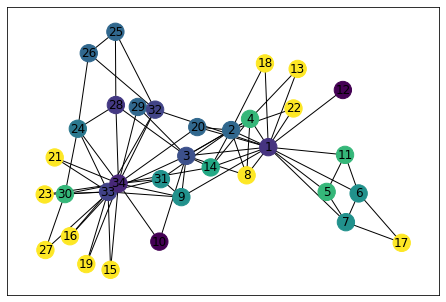

In [32]:
cc = nx.clustering(G)
print(cc)
nx.draw(G,pos=nx.spring_layout(G),node_color=list(cc.values()),with_labels=True) 
plt.axis("on")

5. Compute the degree, closeness and betweenness for the nodes in graph. Again, Visualize the graph and color them according to their centrality values.

(-0.6281951784071417,
 0.5493319266908041,
 -1.1817265175932041,
 0.9124552565760986)

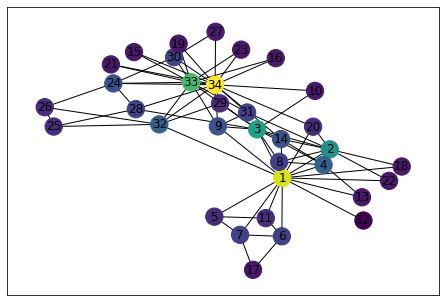

In [33]:
degree = np.array([b for x,b in nx.degree(G)])
nx.draw(G,pos=nx.spring_layout(G),node_color=list(degree),with_labels=True) 
plt.axis("on")

(-0.9004378265472397,
 1.180584589852905,
 -0.7490237761694585,
 0.768605487458341)

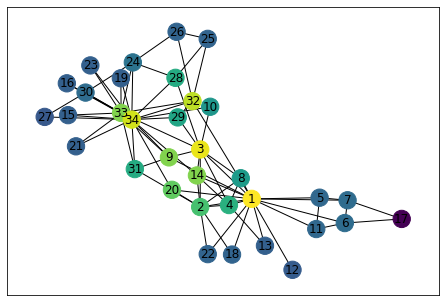

In [34]:
closeness = nx.closeness_centrality(G)
nx.draw(G,pos=nx.spring_layout(G),node_color=list(closeness.values()),with_labels=True) 
plt.axis("on")

(-0.9437161252773452,
 1.1846970073792953,
 -0.5765737224406207,
 0.455146711692756)

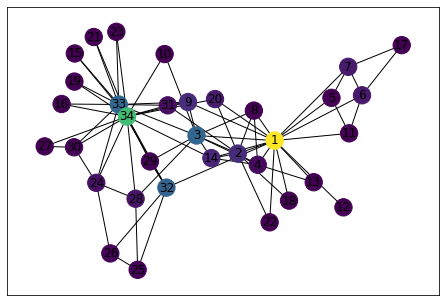

In [35]:
betweenness = nx.betweenness_centrality(G)
nx.draw(G,pos=nx.spring_layout(G),node_color=list(betweenness.values()),with_labels=True) 
plt.axis("on")